# Project Milestone 2  

***Karlie Schwartzwald  
DSC 540 Fall 2022  
Bellevue University***

**Change Control Log:**  

Change#: 1  
Change(s) Made:  Entire Milestone Started and Completed.  
Date of Change:  10/8/2022  
Author: Karlie Schwartzwald  
Change Approved by: Karlie Schwartzwald  
Date Moved to Production: 10/9/2022  

### Cleaning/Formatting Flat File Source

Perform at least 5 data transformation and/or cleansing steps to your flat file data. Make sure you clearly label each transformation (Step #1, Step #2, etc.) in your code and describe what it is doing in 1-2 sentences.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
GDI_df = pd.read_csv('Final Project\GDI.csv')

In [3]:
GDI_df.head(10)

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
0,NaN,NaN,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
1,1.0,Norway,0.990,1,0.949,0.959,84.4,80.4,18.8,17.4,13.0,12.8,"58,548","74,280"
2,2.0,Ireland,0.981,1,0.943,0.961,83.9,80.7,18.8,18.6,12.9,12.4,"55,540","81,401"
3,2.0,Switzerland,0.968,2,0.934,0.965,85.6,81.9,16.2,16.4,12.7,13.6,"57,840","81,137"
4,4.0,"Hong Kong, China (SAR)",0.972,2,0.933,0.959,87.7,82.0,17.1,16.8,11.9,12.7,"45,961","82,993"
5,4.0,Iceland,0.969,2,0.933,0.963,84.5,81.5,20.2,18.0,12.6,13.0,"46,413","62,883"
6,6.0,Germany,0.972,2,0.933,0.960,83.7,78.9,16.9,17.0,13.9,14.4,"45,277","65,599"
7,7.0,Sweden,0.983,1,0.936,0.953,84.6,81.0,20.4,18.6,12.7,12.4,"47,709","61,287"
8,8.0,Australia,0.976,1,0.932,0.955,85.4,81.5,22.4,21.5,12.8,12.7,"39,287","56,954"
9,8.0,Netherlands,0.966,2,0.926,0.960,84.0,80.6,18.8,18.2,12.2,12.7,"46,815","68,685"


### Step 1: Remove NaN Rows and Not Needed Columns

In [4]:
# Drop rows with NaN
GDI_df = GDI_df.dropna()

In [5]:
# Drop unnecesary columns
GDI_df = GDI_df[['Country', 'GDI_Value', 'Lif_Expec_Female', 'Lif_Excep_Male']]
GDI_df.head()

,Country,GDI_Value,Lif_Expec_Female,Lif_Excep_Male
1,Norway,0.990,84.4,80.4
2,Ireland,0.981,83.9,80.7
3,Switzerland,0.968,85.6,81.9
4,"Hong Kong, China (SAR)",0.972,87.7,82.0
5,Iceland,0.969,84.5,81.5


### Step 2: Find Non-Numeric Entries in Numeric Features

In [6]:
# Convert columns to numerical and replace strings with NaN
GDI_df['GDI_Value'] = GDI_df['GDI_Value'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
GDI_df['GDI_Value'].isna().sum()

22

In [7]:
GDI_df['Lif_Expec_Female'] = GDI_df['Lif_Expec_Female'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
GDI_df['Lif_Expec_Female'].isna().sum()

6

In [8]:
GDI_df['Lif_Excep_Male'] = GDI_df['Lif_Excep_Male'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
GDI_df['Lif_Excep_Male'].isna().sum()

6

In [9]:
# Remove new NaN values from tables
GDI_df = GDI_df.dropna()

### Step 3: Check for Outliers

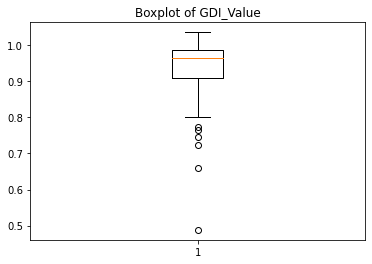

In [10]:
# make histograms for each feature to check for outliers
plt.title(f"Boxplot of GDI_Value")
plt.boxplot(GDI_df['GDI_Value'])
plt.show()

In [11]:
# Closer look at outliers
GDI_df[GDI_df['GDI_Value']< 0.8]

,Country,GDI_Value,Lif_Expec_Female,Lif_Excep_Male
123,Iraq,0.774,72.7,68.6
154,Pakistan,0.745,68.3,66.3
169,Afghanistan,0.659,66.4,63.4
179,Yemen,0.488,67.8,64.4
187,Chad,0.764,55.7,52.8
189,Niger,0.724,63.6,61.3


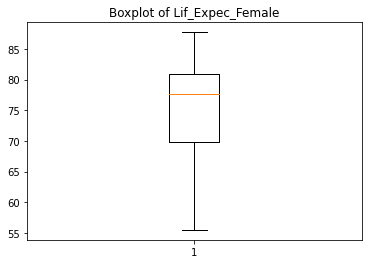

In [12]:
plt.title(f"Boxplot of Lif_Expec_Female")
plt.boxplot(GDI_df['Lif_Expec_Female'])
plt.show()

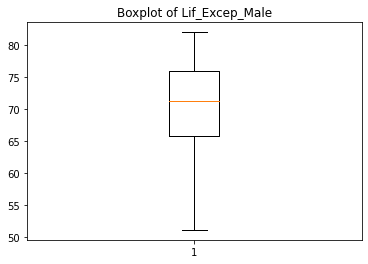

In [13]:
plt.title(f"Boxplot of Lif_Excep_Male")
plt.boxplot(GDI_df['Lif_Excep_Male'])
plt.show()

It appears that the GDI_Value feature has some outliers in it. I beliee these are real observations and not mistakes, and therefore I will keep them in the training set rather than dropping them.

### Step 4: Drop Duplicates

In [14]:
GDI_df.drop_duplicates()

,Country,GDI_Value,Lif_Expec_Female,Lif_Excep_Male
1,Norway,0.990,84.4,80.4
2,Ireland,0.981,83.9,80.7
3,Switzerland,0.968,85.6,81.9
4,"Hong Kong, China (SAR)",0.972,87.7,82.0
5,Iceland,0.969,84.5,81.5
...,...,...,...,...
185,Burundi,0.999,63.4,59.8
186,South Sudan,0.842,59.4,56.4
187,Chad,0.764,55.7,52.8
188,Central African Republic,0.801,55.5,51.1


### Step 5: Transform and Scale Data

In [15]:
# Import scalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
#Make copy of DF for scaling
GDI_df_scaled = GDI_df.copy()
col_names = ['Lif_Expec_Female', 'Lif_Excep_Male']
features = GDI_df_scaled[col_names]

In [17]:
#transform life expectancy columns to between 0 and 1
GDI_df_scaled[col_names] = scaler.fit_transform(features.values)

In [18]:
GDI_df_scaled

,Country,GDI_Value,Lif_Expec_Female,Lif_Excep_Male
1,Norway,0.990,0.897516,0.948220
2,Ireland,0.981,0.881988,0.957929
3,Switzerland,0.968,0.934783,0.996764
4,"Hong Kong, China (SAR)",0.972,1.000000,1.000000
5,Iceland,0.969,0.900621,0.983819
...,...,...,...,...
185,Burundi,0.999,0.245342,0.281553
186,South Sudan,0.842,0.121118,0.171521
187,Chad,0.764,0.006211,0.055016
188,Central African Republic,0.801,0.000000,0.000000


Question: Was I supposed to leave out my test subset before I did fit_transform?